<h1 align='center'><b>Análise das Séries Temporais</b></h1>
<p align="center"><img src=imagens\caracteristicas-das-series-temporais-519x480.jpg width="550" height="350"></p>


<p align='justify'>A Análise de Séries Temporais (AST) pode resolver um problema familiar dos conjuntos de dados que envolve ideias e hipóteses. Alguns Cientistas de Dados utilizam as séries temporais como parte de seu <i>Storytelling</i>. A principal diferença entre a Análise de Séries Temporais e o Aprendizado de Máquina é que a Análise de Séries Temporais não incluem formalmente modelos estatísticos e inferência.</p>
<p> Vamos observar alguns padrões fundamentais para a Análise das Séries Temporais, a partir do carregamento dos conjuntos de dados a identificação de <b>tendências</b> e <b>sazonalidades</b>.
<p> De um modo geral, a Análise de Séries Temporais é parecido com a <b>Análise Exploratória de Dados (EDA, em inglês)</b> específica para AST. Embora essa comparação seja um pouco equivocada uma vez que a AST pode ser tanto descritiva quanto exploratória.</p>
<p>A diferença entre análise descritiva e exploratória é:</p>
<li><b>Análise Descritiva:</b> resumir as características de um Conjunto de Dados.</li>
<li><b>Análise Exploratória:</b> analisar os padrões, tendências, ou relações entre as variáveis.</li>

<p>A AST é o processo de extração de informações estatísticas e sumarizadas de uma Séries Temporal, com foco na análise da tendência e sazonalidade.</p>

<p>O passo a passo para trabalhar com Séries Temporais é:</p>
<li>Importar o conjunto de dados</li>
<li>Fazer a limpeza de dados</li>
<li>Entender as variáveis</li>
<li>Descobrir as relações entre as variáveis</li>
<li>Identificar as tendências e sazonalidades</li>
<li>Realizar o preprocessamento (incluindo <i>feature engineering</i>)</li>
<li>Treinar o modelo de <i>Machine Learning</i></li>

<p>Neste contexto, é importante saber diferenciar as técnicas que podem ser utilizadas com a análise univariada e multivariada. <b>Análise Univariada</b> significa que estaremos observando apenas uma única variável. <b>Análise Multivariada</b> significa que estaremos observando e calculando as correlações entre variáveis, por meio de gráficos <i>Scatter</i>.</p>

In [62]:
# Trabalhando com datas

from datetime import date

hoje = date.today()
dia_D = date(2022,3,6)

from datetime import datetime
agora = datetime.now()

alguma_data = datetime(2022,3,2,15,00,00)
alguma_data.isoformat()

'2022-03-02T15:00:00'

In [63]:
from datetime import timedelta
year = timedelta(days=365)
year * 10

some_date = date.fromisoformat('2022-03-02')
some_date.strftime('%A %d. %B %Y')

'Wednesday 02. March 2022'

<h3>Pandas</h3>

In [64]:
import pandas as pd
pd.date_range(start='2022-01-01', end='2022-12-31')

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [65]:
pd.Series(pd.date_range("2021", freq="D", periods=3))

0   2021-01-01
1   2021-01-02
2   2021-01-03
dtype: datetime64[ns]

In [66]:
df = pd.DataFrame({'year': [2021, 2022],
'month': [3, 4],
'day': [24, 25]}
)
ts1 = pd.to_datetime(df)
ts2 = pd.to_datetime('20210324', format='%Y%m%d')
ts1

0   2021-03-24
1   2022-04-25
dtype: datetime64[ns]

In [67]:
# Trabalhando com Janelas de Rolagem

pd.Series([1,2,3,4,5]).rolling(3).sum()

0     NaN
1     NaN
2     6.0
3     9.0
4    12.0
dtype: float64

In [68]:
import numpy as np
rng = pd.date_range('2022-01-01', '2022-12-31', freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2022-01-01   -1.807309
2022-01-02    1.102219
2022-01-03   -1.226312
2022-01-04   -1.019430
2022-01-05   -0.416049
                ...   
2022-12-27    0.070651
2022-12-28   -1.451192
2022-12-29    0.788581
2022-12-30    0.487625
2022-12-31    0.573036
Freq: D, Length: 365, dtype: float64

In [69]:
# Indexando uma Série Temporal
ts[:2]

2022-01-01   -1.807309
2022-01-02    1.102219
Freq: D, dtype: float64

In [70]:
# Atrasando ou adiantando os dados de uma Série Temporal
ts.shift(1)[:5]

2022-01-01         NaN
2022-01-02   -1.807309
2022-01-03    1.102219
2022-01-04   -1.226312
2022-01-05   -1.019430
Freq: D, dtype: float64

In [71]:
ts.asfreq('M')

2022-01-31    0.712559
2022-02-28    0.492253
2022-03-31    0.122467
2022-04-30   -0.503029
2022-05-31   -0.170333
2022-06-30   -0.248974
2022-07-31    0.127464
2022-08-31   -0.041441
2022-09-30    0.037192
2022-10-31    1.863449
2022-11-30   -1.423311
2022-12-31    0.573036
Freq: M, dtype: float64

In [72]:
# Dados relativos ao Cotação do Dólar de acordo com Banco Central do Brasil

dados = pd.read_csv("data\Cotação do Dólar por período.csv")
len(dados) # tamanho
dados.columns

Index(['cotacaoCompra', 'cotacaoVenda', 'dataHoraCotacao'], dtype='object')

In [73]:
# Renomeando as colunas
dados = dados.rename(
    columns={'cotacaoCompra': 'compra',
    'cotacaoVenda':'venda',
    'dataHoraCotacao':'dataHora'}
)

dados.dtypes

compra      object
venda       object
dataHora    object
dtype: object

In [74]:
# Convertendo os dados de Compra e Venda de String para Float
dados['compra'] = dados['compra'].str.replace(',','.').astype(float)
dados['venda'] = dados['venda'].str.replace(',','.').astype(float)

In [76]:
# Verificando se não há valores nulos
dados.isnull().mean()

compra      0.0
venda       0.0
dataHora    0.0
dtype: float64

In [78]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
compra,297.0,5.385413,0.210185,4.9200,5.2274,5.3904,5.5661,5.8391
venda,297.0,5.386037,0.210201,4.9206,5.2281,5.3910,5.5667,5.8397


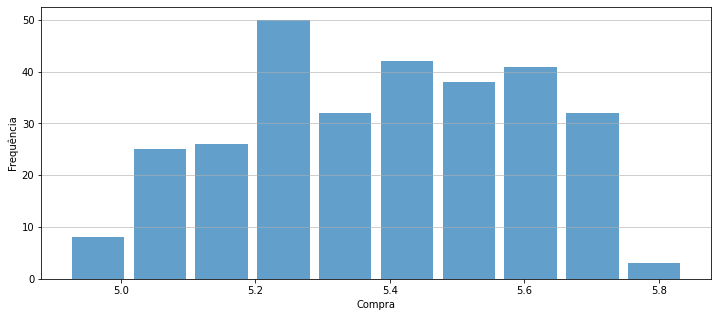

In [84]:
# Vamos plotar esse gráfico
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
n, bins, patches = plt.hist(
    x=dados['compra'],
    bins='auto',
    alpha=0.7,
    rwidth=0.85
)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Compra')
plt.ylabel('Frequência')
plt.show()